In [ ]:
# view how polyfit make sense with FX data (oanda)

In [42]:
from OANDA_FUNC_CONF import *
from datetime import datetime, timezone, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pickle
import random
from scipy import stats

In [2]:
# accountID = '101-011-15612193-001'
# access_token = '2897d1ae787989d30996a8a9d0a2c03d-7304ab578b56ccb454d311ecbc90cfdb'
# api = API(access_token=access_token, environment="practice")

In [422]:
def get_datas(year=2017,month=1,day=10):
    #fmt = "%Y-%m-%dT%H:%M:00.000000000Z"
    fmt = "%Y-%m-%dT%H:%M:%S.000000000Z"
    _from = datetime(year=year, month=month, day=day, hour=0, minute=0, second=0).strftime(fmt)
    datas = History("H1",5000,_from)
    return datas

def localtime(strf):
    fmt = "%Y-%m-%dT%H:%M:%S.000000000Z"
    ptime = datetime.strptime(strf, fmt)
    
    out = ptime.replace(tzinfo=timezone.utc).astimezone(timezone(timedelta(hours=+7)))
    #out = ptime.replace(tzinfo=timezone.utc).astimezone(tz=None)
    return out

In [4]:
data = get_datas()

In [5]:
print(data.t[-1])
print(data.t[0])

2020-02-19T12:00:00.000000000Z
2017-01-10T00:00:00.000000000Z


In [ ]:
usdjpy = []
jptime = []
first_loop = True
for year in range(2015, 2021):
    print(year)
    for month in range(1,13):
        print(month)
        for day in range (1,31, 2):
            if month == 2:
                if day > 28:
                    continue
            # start code
            datas = get_datas(year=year,month=month,day=day)
            t = list(map(localtime, datas.t))
            if first_loop:
                usdjpy.extend(datas.y)
                jptime.extend(t)
                first_loop = False
            else:
                yy = [ y for y, t in zip(datas.y, list(map(localtime, datas.t))) if t > jptime[-1]]
                tt = [ t for y, t in zip(datas.y, list(map(localtime, datas.t))) if t > jptime[-1]]
                usdjpy.extend(yy)
                jptime.extend(tt)

In [ ]:
# save
with open("2019_usdjpy_s30", "wb") as f:
    pickle.dump((usdjpy, jptime), f)

In [ ]:
# read
with open("2020_usdjpy_s30", "rb") as f:
    usdjpy, jptime = pickle.load(f)

In [223]:
def curvefit(arrY):
    y = arrY
    x = np.arange(len(y))
    coe = np.polyfit(x,y,1)
    y1 = np.poly1d(coe)(x)
#     plt.scatter(x,y)
#     plt.plot(x,y1)
#     plt.show()
    
    # 決定関数
    k = np.corrcoef(y,y1)[0,1] **2
#     print("A1:{:.5f} A2:{:.5f} A3{:.5f}".format(coe[0], coe[1], coe[2]))
#     print("Fit rate is {}".format(k))
    return coe, k

def curvefit3(arrY):
    y = arrY
    x = np.arange(len(y))
    coe = np.polyfit(x,y,5)
    y1 = np.poly1d(coe)(x)
#     x2 = np.arange(len(y)*2)
#     y2 = np.poly1d(coe)(x2)
    plt.scatter(x,y)
    plt.plot(x, y1)
#     plt.plot(x2,y2)
    plt.show()
    
    # 決定関数
    k = np.corrcoef(y,y1)[0,1] **2
    print("A1:{:.5f} A2:{:.5f} A3{:.5f}".format(coe[0], coe[1], coe[2]))
    print("Fit rate is {}".format(k))
    return coe, k

def linearFit(arrY):
    y = arrY
    x = np.arange(len(y))
    coe = np.polyfit(x,y,1)
    y1 = np.poly1d(coe)(x)
    #     plt.scatter(x,y)
    #     plt.plot(x,y1)
    #     plt.show()
    # 決定関数
    k = np.corrcoef(y,y1)[0,1] **2
    #     print("A1:{:.5f} A2:{:.5f} A3{:.5f}".format(coe[0], coe[1], coe[2]))
    #     print("Fit rate is {}".format(k))
    return coe, k

In [423]:
data = get_datas(year=2018)
arr = np.array(data.y)#[200000:400000] # cut out some data

In [424]:
# window をコント＝るして勝てるか

In [425]:
# 加重平均を見る

# W, EXP,
Ps = [
    {"W":100, "EX":2},
    {"W":200, "EX":2},
    {"W":300, "EX":2},
    {"W":400, "EX":2},

]

Rs = []

for p in Ps:
    

    was = np.zeros(len(arr))
    i = p["W"]

    while i < len(arr):
        weights = np.arange(len(arr[i-p["W"]:i])) + 1
        wa = np.average(arr[i-p["W"]:i], weights=weights**p["EX"])
        was[i-1] = wa 
    #     vari[i-1] = stats.variation(arr[i-variW:i])
        i += 1
    Rs.append(was.copy())

# variの傾向を表示
# variTrend = np.zeros(len(arr))
# variWindow = 30
# i = variWindow
# while i < len(variTrend):
#     coe, k = linearFit(vari[i-variWindow:i])
#     variTrend[i-1] = coe[0]
#     i += 1
    

In [426]:
# そのまま重ねてマルチ
def showMulti(listY):
    plt.figure(figsize=(160,12))
    for y in listY:
        plt.plot(y)

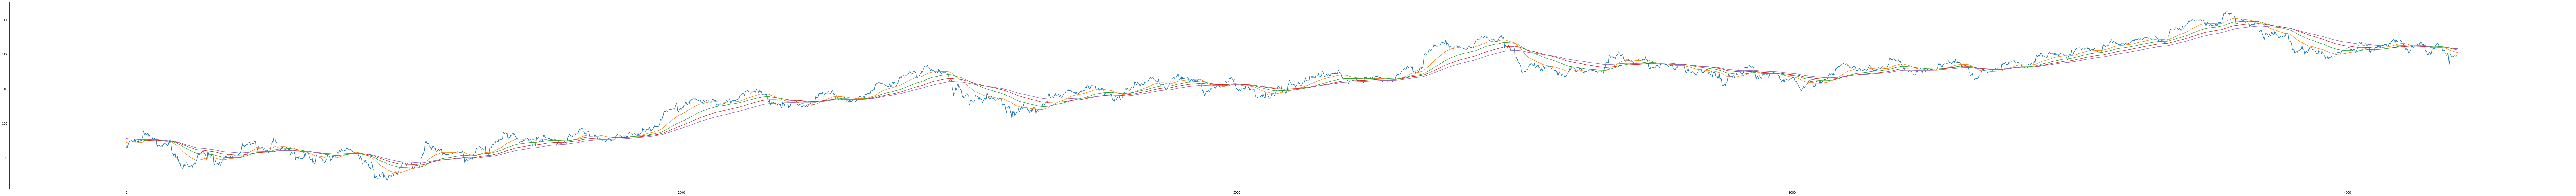

In [427]:
# ２乗var
m=800
showMulti([arr[m:-1],Rs[0][m:-1],Rs[1][m:-1],
           Rs[2][m:-1],Rs[3][m:-1]])
# show2in1(arr[W:-4000],was[W:-4000])
# plt.plot(np.where(vari[W:-1] > 0.003, arr[W:-1], None))

In [ ]:
# run model start

In [428]:
def run(W=150, EX=1):
    class Trade:
        def __init__(self, arr):
            self.position = 0
            self.inPrice = 0
            self.profit = 0
            self.arr = arr

        def long(self,i):
            if self.position == 0:
                self.inPrice = self.arr[i]
                self.position = 1
            elif self.position == 1:
                pass
            elif self.position == -1:
                self.close(i)
        def short(self, i):
            if self.position == 0:
                self.inPrice = self.arr[i]
                self.position = -1
            elif self.position == 1:
                self.close(i)
            elif self.position == -1:
                pass  
        def close(self,i):
            if self.position > 0:
                profit = self.arr[i] - self.inPrice
            elif self.position < 0:
                profit = self.inPrice - self.arr[i]
            else:
                profit = None
            if profit != None:
                print("profit: ", profit)
            else:
                print("WARNING >>>>> DID NOT HAVE ANY POSITION BUT CLOSING...")
            self.profit += profit
            self.position = 0  
            print("total profit: ", self.profit, i)


    t = Trade(arr)
    i = W

    profit = 0

    
    while i < len(arr):
        y = arr[i-W:i+1]

        weights = np.arange(len(y)) + 1
        wa = np.average(y, weights=weights**EX)

        if y[-1] > wa: # 上がった 買い
            t.long(i)
        elif y[-1] < wa:
            t.short(i)


        i += 1
    print("************\n*************END")     
    return t.profit

In [432]:
r = run(W=100,EX=2)

profit:  -0.0020000000000095497
total profit:  -0.0020000000000095497 124
profit:  -0.19599999999999795
total profit:  -0.1980000000000075 130
profit:  -0.10200000000000387
total profit:  -0.30000000000001137 134
profit:  -0.0759999999999934
total profit:  -0.3760000000000048 138
profit:  -0.18299999999999272
total profit:  -0.5589999999999975 158
profit:  -0.02400000000000091
total profit:  -0.5829999999999984 161
profit:  -0.269999999999996
total profit:  -0.8529999999999944 171
profit:  -0.02400000000000091
total profit:  -0.8769999999999953 198
profit:  -0.05700000000000216
total profit:  -0.9339999999999975 204
profit:  -0.12599999999999056
total profit:  -1.059999999999988 206
profit:  -0.37000000000000455
total profit:  -1.4299999999999926 208
profit:  -0.3709999999999951
total profit:  -1.8009999999999877 219
profit:  -0.3050000000000068
total profit:  -2.1059999999999945 222
profit:  -0.2820000000000107
total profit:  -2.3880000000000052 224
profit:  1.0079999999999956
total p

total profit:  -0.4880000000000564 4971
************
*************END


In [435]:
a = 2
r = 1 if a ==2 else -2
print(r)

1


In [326]:
turningU = np.zeros(len(arr))
turningD = np.zeros(len(arr))
i = W
lastState= None

aThres = 0.005 #傾きの閾値
aW = 4 # 4

while i < len(was):
    if lastState == None:
        slope, _ = linearFit(was[i-aW:i] )
        if slope[0] > aThres:
            lastState = 1
        elif slope[0] < -aThres:
            lastState = 0
#         lastState = 1 if slope[0] >  else 0
        continue
    slope, _ = linearFit(was[i-aW:i])
    if slope[0] > aThres:
        cState = 1
    elif slope[0] < -aThres:
        cState = 0
  
    if cState != lastState:
        if cState > 0:
            turningU[i] = 1
        else:
            turningD[i] = 1
        lastState = cState
    i += 1
    
turningSignalU = np.where(turningU>0, arr, None)
turningSignalD = np.where(turningD>0, arr, None) 

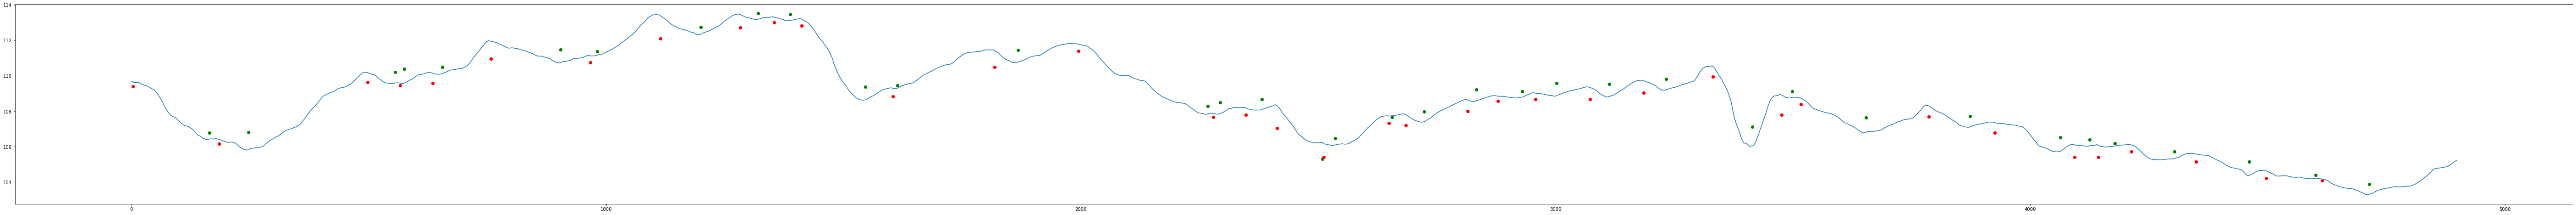

In [327]:
show3in1(was[W:-1],turningSignalU[W:-1], turningSignalD[W:-1])

In [8]:
# 正規化せずに重ねて表示 
def show2org(y1, y2):
    fig, ax1 = plt.subplots()
    #     fig.figure(figsize=(16,6))
    fig.set_figheight(6)
    fig.set_figwidth(40)
    color = 'tab:orange'
    ax1.set_ylabel('usdjpy', color=color)
    ax1.plot(y1, color=color)

    ax2 = ax1.twinx()
    color = "tab:green"
    ax2.set_ylabel("keisu", color=color)
    ax2.scatter(np.arange(len(y2)),y2, color=color, s=3)
    ax2.grid(axis='y',linestyle='dotted', color='b')

    ax1.tick_params(axis='y', labelcolor=color)

In [304]:
# そのままかさねて
def show2in1(y1,y2):
    
    plt.figure(figsize=(100,8))
    plt.plot(y1)
    plt.scatter(np.arange(len(y2)), y2,color="red",s=4)
    #plt.ylim(105,115)


In [279]:
# そのままかさねて
def show3in1(y1,y2, y3):
    
    plt.figure(figsize=(100,8))
    plt.plot(y1)
    plt.scatter(np.arange(len(y2)), y2,color="green",s=40)
    plt.scatter(np.arange(len(y3)), y3,color="red",s=40)
    #plt.ylim(105,115)

In [172]:
def run(W=150, variW=60, variThres=0):
    class Trade:
        def __init__(self, arr):
            self.position = 0
            self.inPrice = 0
            self.profit = 0
            self.arr = arr
            self.lastAve = None # 加重平均より上か下か
        def long(self,i):
            if self.position == 0:
                self.inPrice = self.arr[i]
                self.position = 1
            elif self.position == 1:
                pass
            elif self.position == -1:
                self.close(i)
        def short(self, i):
            if self.position == 0:
                self.inPrice = self.arr[i]
                self.position = -1
            elif self.position == 1:
                self.close(i)
            elif self.position == -1:
                pass  
        def close(self,i):
            if self.position > 0:
                profit = self.arr[i] - self.inPrice
            elif self.position < 0:
                profit = self.inPrice - self.arr[i]
            else:
                profit = None
            if profit != None:
                print("profit: ", profit)
            else:
                print("WARNING >>>>> DID NOT HAVE ANY POSITION BUT CLOSING...")
            self.profit += profit
            self.position = 0  
            print("total profit: ", self.profit)


    t = Trade(arr)
    
    i = W
    position = 0
    profit = 0

    # for 加重平均aram
    pState = None
    trigger = False
    
    while i < len(arr):
        y = arr[i-W:i+1]

        weights = np.arange(len(y)) + 1
        wa = np.average(y, weights=weights**3)

        cState = np.sign(y[-1] - wa)

        if pState == None:
            pState = cState
            continue

        if cState != pState:
            if t.position != 0:

                if cState == 1: # 上がった 買い
                    t.long(i)
                elif cState == -1:
                    t.short(i)
                pState = cState
            else:

                if cState == 1: # 上がった 買い
                    t.long(i)
                elif cState == -1:
                    t.short(i)
                pState = cState

        i += 1
    print("************\n*************END")     
    return t.profit

In [173]:
run(W=270, variW=120, variThres=0.007)

profit:  -0.3399999999999892
total profit:  -0.3399999999999892
profit:  -0.09199999999999875
total profit:  -0.43199999999998795
profit:  -0.19300000000001205
total profit:  -0.625
profit:  -0.018000000000000682
total profit:  -0.6430000000000007
profit:  3.4780000000000086
total profit:  2.835000000000008
profit:  -0.5820000000000078
total profit:  2.253
profit:  -0.05999999999998806
total profit:  2.193000000000012
profit:  -0.15399999999999636
total profit:  2.0390000000000157
profit:  -0.2469999999999999
total profit:  1.7920000000000158
profit:  0.034000000000006025
total profit:  1.8260000000000218
profit:  -0.02400000000000091
total profit:  1.802000000000021
profit:  -0.17099999999999227
total profit:  1.6310000000000286
profit:  -0.21399999999999864
total profit:  1.41700000000003
profit:  1.3220000000000027
total profit:  2.7390000000000327
profit:  -0.0660000000000025
total profit:  2.6730000000000302
profit:  -0.3509999999999991
total profit:  2.322000000000031
profit:  -0

-9.279000000000082

In [174]:
result = {}

W = 10 

for i in range(50):

    p = run(W=W, variW=0, variThres=0)
    result[W] = p
    W +=10
        
 


profit:  -0.23799999999999955
total profit:  -0.23799999999999955
profit:  -0.24199999999999022
total profit:  -0.47999999999998977
profit:  -0.3960000000000008
total profit:  -0.8759999999999906
profit:  0.027999999999991587
total profit:  -0.847999999999999
profit:  0.2980000000000018
total profit:  -0.5499999999999972
profit:  -0.12999999999999545
total profit:  -0.6799999999999926
profit:  -0.06200000000001182
total profit:  -0.7420000000000044
profit:  -0.031999999999996476
total profit:  -0.7740000000000009
profit:  -0.4960000000000093
total profit:  -1.2700000000000102
profit:  -0.375
total profit:  -1.6450000000000102
profit:  -0.7860000000000014
total profit:  -2.4310000000000116
profit:  -0.23900000000000432
total profit:  -2.670000000000016
profit:  -0.21999999999999886
total profit:  -2.890000000000015
profit:  -0.04899999999999238
total profit:  -2.939000000000007
profit:  -0.18900000000000716
total profit:  -3.1280000000000143
profit:  0.6009999999999991
total profit:  -2

profit:  0.10600000000000875
total profit:  -6.31399999999995
profit:  -0.0799999999999983
total profit:  -6.393999999999949
profit:  -0.027000000000001023
total profit:  -6.42099999999995
profit:  -0.034000000000006025
total profit:  -6.454999999999956
profit:  0.875
total profit:  -5.579999999999956
profit:  0.2469999999999999
total profit:  -5.332999999999956
profit:  -0.14100000000000534
total profit:  -5.473999999999961
profit:  -0.042999999999992156
total profit:  -5.516999999999953
profit:  -0.060000000000002274
total profit:  -5.5769999999999555
profit:  0.09900000000000375
total profit:  -5.477999999999952
profit:  -0.1389999999999958
total profit:  -5.616999999999948
profit:  0.11599999999999966
total profit:  -5.500999999999948
profit:  -0.2750000000000057
total profit:  -5.775999999999954
profit:  -0.20999999999999375
total profit:  -5.985999999999947
profit:  -0.15900000000000603
total profit:  -6.144999999999953
profit:  -0.06399999999999295
total profit:  -6.208999999999

total profit:  -0.6669999999999732
profit:  0.5769999999999982
total profit:  -0.08999999999997499
profit:  0.06300000000000239
total profit:  -0.0269999999999726
profit:  -0.2769999999999868
total profit:  -0.3039999999999594
profit:  -0.11999999999999034
total profit:  -0.42399999999994975
profit:  -0.0940000000000083
total profit:  -0.517999999999958
profit:  -0.2949999999999875
total profit:  -0.8129999999999455
profit:  -0.04100000000001103
total profit:  -0.8539999999999566
profit:  -0.09199999999999875
total profit:  -0.9459999999999553
profit:  0.5809999999999889
total profit:  -0.36499999999996646
profit:  -0.04099999999999682
total profit:  -0.4059999999999633
profit:  -0.06999999999999318
total profit:  -0.47599999999995646
profit:  -0.26600000000000534
total profit:  -0.7419999999999618
profit:  -0.6129999999999995
total profit:  -1.3549999999999613
profit:  -0.28699999999999193
total profit:  -1.6419999999999533
profit:  -0.47699999999998965
total profit:  -2.1189999999999

profit:  0.42799999999999727
total profit:  -1.4069999999999965
profit:  -0.03900000000000148
total profit:  -1.445999999999998
profit:  -0.1280000000000001
total profit:  -1.573999999999998
profit:  0.006000000000000227
total profit:  -1.5679999999999978
profit:  1.406000000000006
total profit:  -0.16199999999999193
profit:  -0.22500000000000853
total profit:  -0.38700000000000045
profit:  -0.1700000000000017
total profit:  -0.5570000000000022
profit:  -0.2360000000000042
total profit:  -0.7930000000000064
profit:  -0.12600000000000477
total profit:  -0.9190000000000111
profit:  0.47999999999998977
total profit:  -0.4390000000000214
profit:  0.16400000000000148
total profit:  -0.2750000000000199
profit:  -0.09900000000000375
total profit:  -0.37400000000002365
profit:  0.5580000000000069
total profit:  0.1839999999999833
profit:  -0.03900000000000148
total profit:  0.1449999999999818
profit:  -0.4350000000000023
total profit:  -0.29000000000002046
profit:  -0.19299999999999784
total p

profit:  -0.05100000000000193
total profit:  -3.7919999999998026
profit:  -0.7270000000000039
total profit:  -4.5189999999998065
profit:  0.16300000000001091
total profit:  -4.355999999999796
profit:  0.382000000000005
total profit:  -3.9739999999997906
profit:  -0.04200000000000159
total profit:  -4.015999999999792
profit:  -0.06199999999999761
total profit:  -4.07799999999979
profit:  -0.15000000000000568
total profit:  -4.2279999999997955
profit:  -0.07399999999999807
total profit:  -4.3019999999997935
profit:  0.02400000000000091
total profit:  -4.277999999999793
profit:  -0.1460000000000008
total profit:  -4.423999999999793
profit:  -0.0049999999999954525
total profit:  -4.428999999999789
profit:  -0.38299999999999557
total profit:  -4.8119999999997844
profit:  -0.3430000000000035
total profit:  -5.154999999999788
profit:  -0.1280000000000001
total profit:  -5.282999999999788
profit:  0.7550000000000097
total profit:  -4.527999999999778
profit:  1.156000000000006
total profit:  -3

profit:  4.084000000000003
total profit:  0.6560000000002475
profit:  0.3019999999999925
total profit:  0.95800000000024
profit:  -1.019999999999996
total profit:  -0.06199999999975603
profit:  0.8200000000000074
total profit:  0.7580000000002514
profit:  -0.15000000000000568
total profit:  0.6080000000002457
profit:  -0.4720000000000084
total profit:  0.13600000000023726
profit:  -0.06199999999999761
total profit:  0.07400000000023965
profit:  -0.02199999999999136
total profit:  0.05200000000024829
profit:  -0.08200000000000784
total profit:  -0.029999999999759552
profit:  -0.16800000000000637
total profit:  -0.19799999999976592
profit:  -0.06999999999999318
total profit:  -0.2679999999997591
profit:  -0.26200000000000045
total profit:  -0.5299999999997596
profit:  -0.11599999999999966
total profit:  -0.6459999999997592
profit:  -0.21999999999999886
total profit:  -0.8659999999997581
profit:  0.5429999999999922
total profit:  -0.3229999999997659
profit:  -0.0040000000000048885
total p

profit:  -0.13700000000000045
total profit:  -2.3919999999998964
profit:  -0.4000000000000057
total profit:  -2.791999999999902
profit:  1.6069999999999993
total profit:  -1.1849999999999028
profit:  -0.1039999999999992
total profit:  -1.288999999999902
profit:  -0.11999999999999034
total profit:  -1.4089999999998923
profit:  -0.15800000000000125
total profit:  -1.5669999999998936
profit:  0.6800000000000068
total profit:  -0.8869999999998868
profit:  -0.06900000000000261
total profit:  -0.9559999999998894
profit:  -0.018000000000000682
total profit:  -0.9739999999998901
profit:  0.017000000000010118
total profit:  -0.95699999999988
profit:  -0.053999999999987836
total profit:  -1.0109999999998678
profit:  0.021000000000000796
total profit:  -0.989999999999867
profit:  1.448999999999998
total profit:  0.4590000000001311
profit:  -0.9839999999999947
total profit:  -0.5249999999998636
profit:  -2.1230000000000047
total profit:  -2.6479999999998682
profit:  0.033999999999991815
total prof

profit:  0.05200000000000671
total profit:  -0.842999999999904
profit:  0.257000000000005
total profit:  -0.585999999999899
profit:  -0.000999999999990564
total profit:  -0.5869999999998896
profit:  -0.060000000000002274
total profit:  -0.6469999999998919
profit:  -0.18599999999999284
total profit:  -0.8329999999998847
profit:  -0.04999999999999716
total profit:  -0.8829999999998819
profit:  -0.2750000000000057
total profit:  -1.1579999999998876
profit:  -0.12199999999999989
total profit:  -1.2799999999998875
profit:  -0.08400000000000318
total profit:  -1.3639999999998906
profit:  -0.03900000000000148
total profit:  -1.4029999999998921
profit:  0.46299999999999386
total profit:  -0.9399999999998983
profit:  -0.20299999999998875
total profit:  -1.142999999999887
profit:  0.006000000000000227
total profit:  -1.1369999999998868
profit:  -0.0030000000000001137
total profit:  -1.1399999999998869
profit:  -0.0969999999999942
total profit:  -1.236999999999881
profit:  -0.09100000000000819
to

profit:  1.2789999999999964
total profit:  0.9400000000000119
profit:  -0.013999999999995794
total profit:  0.9260000000000161
profit:  -0.04099999999999682
total profit:  0.8850000000000193
profit:  -0.0759999999999934
total profit:  0.8090000000000259
profit:  -0.1319999999999908
total profit:  0.6770000000000351
profit:  0.16100000000000136
total profit:  0.8380000000000365
profit:  -0.000999999999990564
total profit:  0.8370000000000459
profit:  -0.13400000000000034
total profit:  0.7030000000000456
profit:  -0.2750000000000057
total profit:  0.4280000000000399
profit:  -0.12199999999999989
total profit:  0.30600000000004
profit:  -0.08400000000000318
total profit:  0.22200000000003683
profit:  -0.03900000000000148
total profit:  0.18300000000003536
profit:  0.46299999999999386
total profit:  0.6460000000000292
profit:  -0.22099999999998943
total profit:  0.4250000000000398
profit:  0.006000000000000227
total profit:  0.43100000000004
profit:  -0.04399999999999693
total profit:  0.

profit:  -0.04600000000000648
total profit:  -1.9809999999999803
profit:  -0.980000000000004
total profit:  -2.9609999999999843
profit:  -0.17200000000001125
total profit:  -3.1329999999999956
profit:  -0.27299999999999613
total profit:  -3.4059999999999917
profit:  -0.11999999999999034
total profit:  -3.525999999999982
profit:  1.6260000000000048
total profit:  -1.8999999999999773
profit:  -0.09000000000000341
total profit:  -1.9899999999999807
profit:  -0.12399999999999523
total profit:  -2.113999999999976
profit:  -0.07600000000000762
total profit:  -2.1899999999999835
profit:  -0.19599999999999795
total profit:  -2.3859999999999815
profit:  -0.11599999999999966
total profit:  -2.501999999999981
profit:  1.2789999999999964
total profit:  -1.2229999999999848
profit:  -0.009000000000000341
total profit:  -1.231999999999985
profit:  -0.0759999999999934
total profit:  -1.3079999999999785
profit:  -0.1319999999999908
total profit:  -1.4399999999999693
profit:  0.16100000000000136
total p

profit:  -0.27299999999999613
total profit:  -2.190000000000012
profit:  -0.11999999999999034
total profit:  -2.3100000000000023
profit:  1.6260000000000048
total profit:  -0.6839999999999975
profit:  -0.09000000000000341
total profit:  -0.7740000000000009
profit:  -0.09199999999999875
total profit:  -0.8659999999999997
profit:  -0.117999999999995
total profit:  -0.9839999999999947
profit:  -0.02599999999999625
total profit:  -1.009999999999991
profit:  -0.2079999999999984
total profit:  -1.2179999999999893
profit:  -0.1360000000000099
total profit:  -1.3539999999999992
profit:  -0.19599999999999795
total profit:  -1.5499999999999972
profit:  -0.016000000000005343
total profit:  -1.5660000000000025
profit:  -0.21999999999999886
total profit:  -1.7860000000000014
profit:  1.262999999999991
total profit:  -0.5230000000000103
profit:  -0.0759999999999934
total profit:  -0.5990000000000038
profit:  -0.1319999999999908
total profit:  -0.7309999999999945
profit:  0.16100000000000136
total pr

profit:  -0.18900000000000716
total profit:  -2.752999999999986
profit:  -0.08799999999999386
total profit:  -2.8409999999999798
profit:  -0.018999999999991246
total profit:  -2.859999999999971
profit:  -0.06199999999999761
total profit:  -2.9219999999999686
profit:  -0.1770000000000067
total profit:  -3.0989999999999753
profit:  0.7950000000000017
total profit:  -2.3039999999999736
profit:  -0.19199999999999307
total profit:  -2.4959999999999667
profit:  -0.12199999999999989
total profit:  -2.6179999999999666
profit:  0.9699999999999989
total profit:  -1.6479999999999677
profit:  -0.10000000000000853
total profit:  -1.7479999999999762
profit:  4.9879999999999995
total profit:  3.2400000000000233
profit:  -1.1589999999999918
total profit:  2.0810000000000315
profit:  1.2390000000000043
total profit:  3.320000000000036
profit:  0.4469999999999885
total profit:  3.7670000000000243
profit:  -0.06400000000000716
total profit:  3.703000000000017
profit:  -0.0660000000000025
total profit:  3

profit:  -0.16400000000000148
total profit:  -1.80300000000004
profit:  0.3019999999999925
total profit:  -1.5010000000000474
profit:  -0.2469999999999999
total profit:  -1.7480000000000473
profit:  -0.23699999999999477
total profit:  -1.985000000000042
profit:  -0.14999999999999147
total profit:  -2.1350000000000335
profit:  0.10099999999999909
total profit:  -2.0340000000000344
profit:  -0.036000000000001364
total profit:  -2.070000000000036
profit:  0.006000000000000227
total profit:  -2.0640000000000356
profit:  -0.17199999999999704
total profit:  -2.2360000000000326
profit:  -0.18900000000000716
total profit:  -2.42500000000004
profit:  -0.10800000000000409
total profit:  -2.533000000000044
profit:  -0.06199999999999761
total profit:  -2.5950000000000415
profit:  -0.1770000000000067
total profit:  -2.772000000000048
profit:  -0.05100000000000193
total profit:  -2.82300000000005
profit:  0.7140000000000128
total profit:  -2.1090000000000373
profit:  -0.12000000000000455
total profi

profit:  -0.3019999999999925
total profit:  0.4199999999999875
profit:  -0.19599999999999795
total profit:  0.22399999999998954
profit:  -0.10300000000000864
total profit:  0.1209999999999809
profit:  -0.08100000000000307
total profit:  0.03999999999997783
profit:  -0.02400000000000091
total profit:  0.01599999999997692
profit:  -0.1290000000000049
total profit:  -0.11300000000002797
profit:  -0.19700000000000273
total profit:  -0.3100000000000307
profit:  -0.10699999999999932
total profit:  -0.41700000000003
profit:  -0.18700000000001182
total profit:  -0.6040000000000418
profit:  0.0940000000000083
total profit:  -0.5100000000000335
profit:  -0.10699999999999932
total profit:  -0.6170000000000329
profit:  -0.12700000000000955
total profit:  -0.7440000000000424
profit:  -0.1599999999999966
total profit:  -0.904000000000039
profit:  -0.15399999999999636
total profit:  -1.0580000000000354
profit:  -0.15900000000000603
total profit:  -1.2170000000000414
profit:  0.24200000000000443
total

profit:  -0.12000000000000455
total profit:  0.3319999999999652
profit:  -0.3810000000000002
total profit:  -0.049000000000035016
profit:  -0.08199999999999363
total profit:  -0.13100000000002865
profit:  -0.10300000000000864
total profit:  -0.2340000000000373
profit:  -0.08100000000000307
total profit:  -0.31500000000004036
profit:  -0.21300000000000807
total profit:  -0.5280000000000484
profit:  -0.19700000000000273
total profit:  -0.7250000000000512
profit:  -0.07500000000000284
total profit:  -0.800000000000054
profit:  -0.15200000000000102
total profit:  -0.952000000000055
profit:  0.0940000000000083
total profit:  -0.8580000000000467
profit:  -0.10699999999999932
total profit:  -0.965000000000046
profit:  -0.12700000000000955
total profit:  -1.0920000000000556
profit:  -0.007999999999995566
total profit:  -1.1000000000000512
profit:  -0.15399999999999636
total profit:  -1.2540000000000475
profit:  -0.15900000000000603
total profit:  -1.4130000000000535
profit:  0.2420000000000044

profit:  -0.16400000000000148
total profit:  -0.053999999999987836
profit:  -0.11699999999999022
total profit:  -0.17099999999997806
profit:  -0.18199999999998795
total profit:  -0.352999999999966
profit:  0.35999999999999943
total profit:  0.007000000000033424
profit:  0.2890000000000015
total profit:  0.2960000000000349
profit:  -0.36599999999999966
total profit:  -0.06999999999996476
profit:  -0.3020000000000067
total profit:  -0.37199999999997146
profit:  -0.12000000000000455
total profit:  -0.491999999999976
profit:  -0.3810000000000002
total profit:  -0.8729999999999762
profit:  -0.08199999999999363
total profit:  -0.9549999999999699
profit:  -0.10300000000000864
total profit:  -1.0579999999999785
profit:  -0.20600000000000307
total profit:  -1.2639999999999816
profit:  -0.21300000000000807
total profit:  -1.4769999999999897
profit:  -0.12699999999999534
total profit:  -1.603999999999985
profit:  -0.060000000000002274
total profit:  -1.6639999999999873
profit:  -0.362999999999999

profit:  -0.12000000000000455
total profit:  -0.396000000000015
profit:  -0.4539999999999935
total profit:  -0.8500000000000085
profit:  -0.08199999999999363
total profit:  -0.9320000000000022
profit:  -0.20600000000000307
total profit:  -1.1380000000000052
profit:  -0.21300000000000807
total profit:  -1.3510000000000133
profit:  -0.12699999999999534
total profit:  -1.4780000000000086
profit:  -0.060000000000002274
total profit:  -1.538000000000011
profit:  -0.36299999999999955
total profit:  -1.9010000000000105
profit:  -0.01099999999999568
total profit:  -1.9120000000000061
profit:  -0.10699999999999932
total profit:  -2.0190000000000055
profit:  -0.12700000000000955
total profit:  -2.146000000000015
profit:  -0.28600000000000136
total profit:  -2.4320000000000164
profit:  -0.18599999999999284
total profit:  -2.618000000000009
profit:  -0.15900000000000603
total profit:  -2.7770000000000152
profit:  0.24200000000000443
total profit:  -2.535000000000011
profit:  -0.24200000000000443
t

profit:  -0.12699999999999534
total profit:  0.7769999999999726
profit:  -0.36299999999999955
total profit:  0.41399999999997306
profit:  0.05299999999999727
total profit:  0.4669999999999703
profit:  -0.12700000000000955
total profit:  0.3399999999999608
profit:  -0.28600000000000136
total profit:  0.053999999999959414
profit:  -0.18599999999999284
total profit:  -0.13200000000003342
profit:  -0.15900000000000603
total profit:  -0.29100000000003945
profit:  0.24200000000000443
total profit:  -0.049000000000035016
profit:  -0.24200000000000443
total profit:  -0.29100000000003945
profit:  -0.14100000000000534
total profit:  -0.4320000000000448
profit:  -1.1890000000000072
total profit:  -1.621000000000052
profit:  -0.27299999999999613
total profit:  -1.894000000000048
profit:  -0.11999999999999034
total profit:  -2.0140000000000384
profit:  1.315000000000012
total profit:  -0.6990000000000265
profit:  -0.117999999999995
total profit:  -0.8170000000000215
profit:  -0.02599999999999625
to

profit:  -0.05499999999999261
total profit:  2.793999999999997
profit:  -0.06900000000000261
total profit:  2.7249999999999943
profit:  -0.16400000000000148
total profit:  2.560999999999993
profit:  -0.11699999999999022
total profit:  2.4440000000000026
profit:  -0.18199999999998795
total profit:  2.2620000000000147
profit:  -0.07800000000000296
total profit:  2.1840000000000117
profit:  0.2740000000000009
total profit:  2.4580000000000126
profit:  -0.01999999999999602
total profit:  2.4380000000000166
profit:  0.40099999999999625
total profit:  2.839000000000013
profit:  -0.12999999999999545
total profit:  2.7090000000000174
profit:  -0.2890000000000015
total profit:  2.420000000000016
profit:  0.013999999999995794
total profit:  2.4340000000000117
profit:  -0.04399999999999693
total profit:  2.390000000000015
profit:  -0.20600000000000307
total profit:  2.1840000000000117
profit:  -0.2360000000000042
total profit:  1.9480000000000075
profit:  -0.12699999999999534
total profit:  1.821

profit:  1.315000000000012
total profit:  1.0930000000000604
profit:  -0.14300000000000068
total profit:  0.9500000000000597
profit:  -0.36599999999999966
total profit:  0.58400000000006
profit:  -0.07600000000000762
total profit:  0.5080000000000524
profit:  -0.19599999999999795
total profit:  0.31200000000005446
profit:  -0.1700000000000017
total profit:  0.14200000000005275
profit:  0.7139999999999986
total profit:  0.8560000000000514
profit:  0.19899999999999807
total profit:  1.0550000000000495
profit:  -0.04999999999999716
total profit:  1.0050000000000523
profit:  -0.2750000000000057
total profit:  0.7300000000000466
profit:  0.25200000000000955
total profit:  0.9820000000000562
profit:  -0.33800000000000807
total profit:  0.6440000000000481
profit:  -0.14400000000000546
total profit:  0.5000000000000426
profit:  0.3780000000000001
total profit:  0.8780000000000427
profit:  0.7999999999999972
total profit:  1.67800000000004
profit:  -0.02600000000001046
total profit:  1.65200000

profit:  1.4569999999999936
total profit:  3.0180000000000007
profit:  -0.10300000000000864
total profit:  2.914999999999992
profit:  -0.1349999999999909
total profit:  2.780000000000001
profit:  -0.37299999999999045
total profit:  2.4070000000000107
profit:  0.695999999999998
total profit:  3.1030000000000086
profit:  -0.0030000000000001137
total profit:  3.1000000000000085
profit:  -0.11599999999999966
total profit:  2.984000000000009
profit:  -0.03700000000000614
total profit:  2.9470000000000027
profit:  0.02599999999999625
total profit:  2.972999999999999
profit:  -0.08400000000000318
total profit:  2.888999999999996
profit:  -0.3200000000000074
total profit:  2.5689999999999884
profit:  -0.24499999999999034
total profit:  2.323999999999998
profit:  -0.13800000000000523
total profit:  2.185999999999993
profit:  -0.027000000000001023
total profit:  2.158999999999992
profit:  -0.3569999999999993
total profit:  1.8019999999999925
profit:  -0.04899999999999238
total profit:  1.7530000

profit:  0.3780000000000001
total profit:  0.35600000000000875
profit:  0.7999999999999972
total profit:  1.156000000000006
profit:  -0.29400000000001114
total profit:  0.8619999999999948
profit:  -0.38700000000000045
total profit:  0.4749999999999943
profit:  -0.3019999999999925
total profit:  0.17300000000000182
profit:  1.902000000000001
total profit:  2.075000000000003
profit:  -0.7239999999999895
total profit:  1.3510000000000133
profit:  -0.11299999999999955
total profit:  1.2380000000000138
profit:  0.027000000000001023
total profit:  1.2650000000000148
profit:  -0.09600000000000364
total profit:  1.1690000000000111
profit:  0.3240000000000123
total profit:  1.4930000000000234
profit:  0.33500000000000796
total profit:  1.8280000000000314
profit:  -0.19000000000001194
total profit:  1.6380000000000194
profit:  -0.0870000000000033
total profit:  1.5510000000000161
profit:  0.09799999999999898
total profit:  1.6490000000000151
profit:  -0.005000000000009663
total profit:  1.644000

profit:  -0.19000000000001194
total profit:  1.958999999999989
profit:  0.09799999999999898
total profit:  2.056999999999988
profit:  -0.005000000000009663
total profit:  2.0519999999999783
profit:  -0.16200000000000614
total profit:  1.8899999999999721
profit:  -0.2680000000000007
total profit:  1.6219999999999715
profit:  -0.10699999999999932
total profit:  1.5149999999999721
profit:  -0.1979999999999933
total profit:  1.3169999999999789
profit:  -0.1110000000000042
total profit:  1.2059999999999746
profit:  -0.39400000000000546
total profit:  0.8119999999999692
profit:  -0.006000000000000227
total profit:  0.805999999999969
profit:  -0.3370000000000033
total profit:  0.46899999999996567
profit:  -0.10600000000000875
total profit:  0.3629999999999569
profit:  -0.18999999999999773
total profit:  0.1729999999999592
profit:  -0.242999999999995
total profit:  -0.07000000000003581
profit:  -0.06399999999999295
total profit:  -0.13400000000002876
profit:  -0.13299999999999557
total profit:

profit:  0.016999999999995907
total profit:  -1.975000000000037
profit:  -0.027999999999991587
total profit:  -2.0030000000000285
profit:  -0.0030000000000001137
total profit:  -2.0060000000000286
profit:  -0.20699999999999363
total profit:  -2.2130000000000223
profit:  -0.016000000000005343
total profit:  -2.2290000000000276
profit:  -0.32099999999999795
total profit:  -2.5500000000000256
profit:  -0.05100000000000193
total profit:  -2.6010000000000275
profit:  -0.06800000000001205
total profit:  -2.6690000000000396
profit:  -0.11400000000000432
total profit:  -2.783000000000044
profit:  -0.03700000000000614
total profit:  -2.82000000000005
profit:  -0.08200000000000784
total profit:  -2.902000000000058
profit:  -0.13799999999999102
total profit:  -3.040000000000049
profit:  -0.0759999999999934
total profit:  -3.1160000000000423
profit:  -0.2120000000000033
total profit:  -3.3280000000000456
profit:  -0.023000000000010346
total profit:  -3.351000000000056
profit:  -0.0660000000000025


profit:  3.686000000000007
total profit:  3.1140000000000043
profit:  -0.16800000000000637
total profit:  2.945999999999998
profit:  -0.01999999999999602
total profit:  2.926000000000002
profit:  -0.2469999999999999
total profit:  2.679000000000002
profit:  0.034000000000006025
total profit:  2.713000000000008
profit:  0.02400000000000091
total profit:  2.737000000000009
profit:  -0.17099999999999227
total profit:  2.5660000000000167
profit:  -0.21399999999999864
total profit:  2.352000000000018
profit:  1.3220000000000027
total profit:  3.674000000000021
profit:  -0.0660000000000025
total profit:  3.6080000000000183
profit:  -0.5019999999999953
total profit:  3.106000000000023
profit:  -0.19400000000000261
total profit:  2.9120000000000203
profit:  -0.14300000000000068
total profit:  2.7690000000000197
profit:  -0.18500000000000227
total profit:  2.5840000000000174
profit:  -0.25
total profit:  2.3340000000000174
profit:  -0.1560000000000059
total profit:  2.1780000000000115
profit:  

profit:  1.9580000000000126
total profit:  3.9620000000000175
profit:  -0.17499999999999716
total profit:  3.7870000000000203
profit:  -0.4730000000000132
total profit:  3.314000000000007
profit:  -0.17800000000001148
total profit:  3.1359999999999957
profit:  -0.132000000000005
total profit:  3.0039999999999907
profit:  0.17099999999999227
total profit:  3.174999999999983
profit:  0.031999999999996476
total profit:  3.2069999999999794
profit:  -0.09099999999999397
total profit:  3.1159999999999854
profit:  -0.16100000000000136
total profit:  2.954999999999984
profit:  -0.35599999999999454
total profit:  2.5989999999999895
profit:  -0.0940000000000083
total profit:  2.5049999999999812
profit:  -0.10999999999999943
total profit:  2.394999999999982
profit:  -0.5300000000000011
total profit:  1.8649999999999807
profit:  1.0139999999999958
total profit:  2.8789999999999765
profit:  0.5079999999999956
total profit:  3.386999999999972
profit:  -0.09399999999999409
total profit:  3.2929999999

profit:  -0.18300000000000693
total profit:  1.816999999999993
profit:  -0.5019999999999953
total profit:  1.3149999999999977
profit:  1.6199999999999903
total profit:  2.934999999999988
profit:  -0.0519999999999925
total profit:  2.8829999999999956
profit:  -0.0030000000000001137
total profit:  2.8799999999999955
profit:  -0.8070000000000022
total profit:  2.0729999999999933
profit:  0.09799999999999898
total profit:  2.1709999999999923
profit:  -0.22400000000000375
total profit:  1.9469999999999885
profit:  0.40099999999999625
total profit:  2.3479999999999848
profit:  -0.11499999999999488
total profit:  2.23299999999999
profit:  -0.07800000000000296
total profit:  2.154999999999987
profit:  -0.1880000000000024
total profit:  1.9669999999999845
profit:  -0.055999999999997385
total profit:  1.9109999999999872
profit:  -0.3919999999999959
total profit:  1.5189999999999912
profit:  -0.12700000000000955
total profit:  1.3919999999999817
profit:  -0.28600000000000136
total profit:  1.1059

profit:  0.730000000000004
total profit:  0.7689999999999628
profit:  0.2950000000000017
total profit:  1.0639999999999645
profit:  -0.06799999999999784
total profit:  0.9959999999999667
profit:  -0.08299999999999841
total profit:  0.9129999999999683
profit:  -0.1280000000000001
total profit:  0.7849999999999682
profit:  -0.2750000000000057
total profit:  0.5099999999999625
profit:  0.11599999999999966
total profit:  0.6259999999999621
profit:  -0.14400000000000546
total profit:  0.4819999999999567
profit:  0.14000000000000057
total profit:  0.6219999999999573
profit:  -0.09099999999999397
total profit:  0.5309999999999633
profit:  -0.10400000000001342
total profit:  0.42699999999994986
profit:  0.7999999999999972
total profit:  1.226999999999947
profit:  -0.09000000000000341
total profit:  1.1369999999999436
profit:  -0.28300000000000125
total profit:  0.8539999999999424
profit:  -1.722999999999999
total profit:  -0.8690000000000566
profit:  0.9969999999999999
total profit:  0.1279999

profit:  0.7999999999999972
total profit:  0.5229999999999677
profit:  -0.19199999999999307
total profit:  0.33099999999997465
profit:  -1.722999999999999
total profit:  -1.3920000000000243
profit:  -0.2890000000000015
total profit:  -1.6810000000000258
profit:  0.9900000000000091
total profit:  -0.6910000000000167
profit:  -0.7239999999999895
total profit:  -1.4150000000000063
profit:  -0.8719999999999999
total profit:  -2.287000000000006
profit:  -0.11299999999999955
total profit:  -2.4000000000000057
profit:  -0.18099999999999739
total profit:  -2.581000000000003
profit:  -0.057999999999992724
total profit:  -2.638999999999996
profit:  -0.12100000000000932
total profit:  -2.760000000000005
profit:  -0.12400000000000944
total profit:  -2.8840000000000146
profit:  -0.24200000000000443
total profit:  -3.126000000000019
profit:  -0.20199999999999818
total profit:  -3.328000000000017
profit:  -0.009000000000000341
total profit:  -3.3370000000000175
profit:  0.15500000000000114
total prof

profit:  -0.05299999999999727
total profit:  -4.918000000000035
profit:  -0.1979999999999933
total profit:  -5.116000000000028
profit:  -0.1110000000000042
total profit:  -5.227000000000032
profit:  -0.08100000000000307
total profit:  -5.308000000000035
profit:  -0.09999999999999432
total profit:  -5.40800000000003
profit:  -0.5939999999999941
total profit:  -6.002000000000024
profit:  -0.20699999999999363
total profit:  -6.209000000000017
profit:  -0.016000000000005343
total profit:  -6.225000000000023
profit:  -0.06800000000001205
total profit:  -6.293000000000035
profit:  -0.09499999999999886
total profit:  -6.388000000000034
profit:  -0.11400000000000432
total profit:  -6.502000000000038
profit:  -0.14400000000000546
total profit:  -6.646000000000043
profit:  -0.24199999999999022
total profit:  -6.888000000000034
profit:  -0.04999999999999716
total profit:  -6.938000000000031
profit:  -0.07700000000001239
total profit:  -7.015000000000043
profit:  -0.0660000000000025
total profit: 

profit:  3.2139999999999986
total profit:  2.9140000000000015
profit:  -0.12699999999999534
total profit:  2.787000000000006
profit:  -0.2469999999999999
total profit:  2.5400000000000063
profit:  0.034000000000006025
total profit:  2.5740000000000123
profit:  -0.06200000000001182
total profit:  2.5120000000000005
profit:  -0.17099999999999227
total profit:  2.341000000000008
profit:  -0.21399999999999864
total profit:  2.1270000000000095
profit:  0.8739999999999952
total profit:  3.0010000000000048
profit:  -0.03900000000000148
total profit:  2.9620000000000033
profit:  -0.269999999999996
total profit:  2.6920000000000073
profit:  -0.07800000000000296
total profit:  2.6140000000000043
profit:  -0.24399999999999977
total profit:  2.3700000000000045
profit:  -0.14300000000000068
total profit:  2.227000000000004
profit:  -0.18500000000000227
total profit:  2.0420000000000016
profit:  -0.25
total profit:  1.7920000000000016
profit:  -0.1560000000000059
total profit:  1.6359999999999957
pr

profit:  -0.0379999999999967
total profit:  -2.328000000000003
profit:  -0.5939999999999941
total profit:  -2.921999999999997
profit:  -0.4069999999999965
total profit:  -3.3289999999999935
profit:  -0.049000000000006594
total profit:  -3.378
profit:  -0.0589999999999975
total profit:  -3.4369999999999976
profit:  -0.26300000000000523
total profit:  -3.700000000000003
profit:  -0.09299999999998931
total profit:  -3.792999999999992
profit:  0.9599999999999937
total profit:  -2.8329999999999984
profit:  2.166000000000011
total profit:  -0.6669999999999874
profit:  -0.15800000000000125
total profit:  -0.8249999999999886
profit:  -0.3689999999999998
total profit:  -1.1939999999999884
profit:  -0.347999999999999
total profit:  -1.5419999999999874
profit:  -0.08899999999999864
total profit:  -1.630999999999986
profit:  -0.008000000000009777
total profit:  -1.6389999999999958
profit:  -0.18500000000000227
total profit:  -1.823999999999998
profit:  -0.04799999999998761
total profit:  -1.871999

profit:  -0.0800000000000125
total profit:  -2.197000000000017
profit:  -0.09100000000000819
total profit:  -2.288000000000025
profit:  -0.06900000000000261
total profit:  -2.3570000000000277
profit:  -0.1700000000000017
total profit:  -2.5270000000000294
profit:  -0.07099999999999795
total profit:  -2.5980000000000274
profit:  -0.08100000000000307
total profit:  -2.6790000000000305
profit:  -0.05700000000000216
total profit:  -2.7360000000000326
profit:  -0.5420000000000016
total profit:  -3.278000000000034
profit:  -0.0799999999999983
total profit:  -3.3580000000000325
profit:  -0.15099999999999625
total profit:  -3.5090000000000288
profit:  0.10599999999999454
total profit:  -3.403000000000034
profit:  1.7249999999999943
total profit:  -1.67800000000004
profit:  -1.179000000000002
total profit:  -2.857000000000042
profit:  -1.0480000000000018
total profit:  -3.9050000000000438
profit:  -0.47999999999998977
total profit:  -4.3850000000000335
profit:  -0.4059999999999917
total profit:

profit:  -0.28699999999999193
total profit:  -7.193000000000012
profit:  0.0
total profit:  -7.193000000000012
profit:  -0.18600000000000705
total profit:  -7.379000000000019
profit:  -0.058000000000006935
total profit:  -7.437000000000026
profit:  -0.08500000000000796
total profit:  -7.522000000000034
profit:  0.48099999999999454
total profit:  -7.0410000000000394
profit:  -0.03999999999999204
total profit:  -7.0810000000000315
profit:  -0.16300000000001091
total profit:  -7.244000000000042
profit:  -0.43600000000000705
total profit:  -7.6800000000000495
profit:  -0.03100000000000591
total profit:  -7.711000000000055
profit:  -0.05100000000000193
total profit:  -7.762000000000057
profit:  0.10099999999999909
total profit:  -7.661000000000058
profit:  -0.39000000000000057
total profit:  -8.051000000000059
profit:  -0.07800000000000296
total profit:  -8.129000000000062
profit:  0.08899999999999864
total profit:  -8.040000000000063
profit:  -0.15699999999999648
total profit:  -8.19700000

profit:  -0.27200000000000557
total profit:  -0.27200000000000557
profit:  -0.07800000000000296
total profit:  -0.3500000000000085
profit:  -0.3689999999999998
total profit:  -0.7190000000000083
profit:  -0.12300000000000466
total profit:  -0.842000000000013
profit:  -0.27199999999999136
total profit:  -1.1140000000000043
profit:  -0.1290000000000049
total profit:  -1.2430000000000092
profit:  -0.409000000000006
total profit:  -1.6520000000000152
profit:  -0.4579999999999984
total profit:  -2.1100000000000136
profit:  -0.29000000000000625
total profit:  -2.40000000000002
profit:  -0.2219999999999942
total profit:  -2.622000000000014
profit:  -0.16199999999999193
total profit:  -2.784000000000006
profit:  -0.018000000000000682
total profit:  -2.8020000000000067
profit:  -0.45600000000000307
total profit:  -3.2580000000000098
profit:  -0.1979999999999933
total profit:  -3.456000000000003
profit:  -0.20600000000000307
total profit:  -3.662000000000006
profit:  -0.28300000000000125
total p

profit:  -0.0799999999999983
total profit:  -6.865000000000023
profit:  -0.16500000000000625
total profit:  -7.03000000000003
profit:  -0.09000000000000341
total profit:  -7.120000000000033
profit:  3.1640000000000015
total profit:  -3.9560000000000315
profit:  -0.4069999999999965
total profit:  -4.363000000000028
profit:  -0.16599999999999682
total profit:  -4.529000000000025
profit:  -0.2190000000000083
total profit:  -4.748000000000033
profit:  -0.010000000000005116
total profit:  -4.758000000000038
profit:  -0.125
total profit:  -4.883000000000038
profit:  2.945999999999998
total profit:  -1.9370000000000402
profit:  -0.10800000000000409
total profit:  -2.0450000000000443
profit:  -0.06999999999999318
total profit:  -2.1150000000000375
profit:  -0.06400000000000716
total profit:  -2.1790000000000447
profit:  -0.14500000000001023
total profit:  -2.324000000000055
profit:  -0.1699999999999875
total profit:  -2.4940000000000424
profit:  -0.5349999999999966
total profit:  -3.0290000000

profit:  -0.13700000000000045
total profit:  -3.4950000000000045
profit:  -0.1039999999999992
total profit:  -3.5990000000000038
profit:  -0.15200000000000102
total profit:  -3.7510000000000048
profit:  -0.13800000000000523
total profit:  -3.88900000000001
profit:  -0.37699999999999534
total profit:  -4.266000000000005
profit:  -0.5420000000000016
total profit:  -4.808000000000007
profit:  -0.24200000000000443
total profit:  -5.050000000000011
profit:  -0.15099999999999625
total profit:  -5.201000000000008
profit:  -0.0799999999999983
total profit:  -5.281000000000006
profit:  -0.05500000000000682
total profit:  -5.336000000000013
profit:  1.711999999999989
total profit:  -3.6240000000000236
profit:  -0.5480000000000018
total profit:  -4.1720000000000255
profit:  -0.47999999999998977
total profit:  -4.652000000000015
profit:  -0.4059999999999917
total profit:  -5.058000000000007
profit:  -0.9449999999999932
total profit:  -6.003
profit:  -0.18500000000000227
total profit:  -6.188000000

profit:  -0.37299999999999045
total profit:  -5.5660000000000025
profit:  -0.13800000000000523
total profit:  -5.704000000000008
profit:  -0.02400000000000091
total profit:  -5.728000000000009
profit:  -0.09499999999999886
total profit:  -5.8230000000000075
profit:  -0.2540000000000049
total profit:  -6.077000000000012
profit:  0.030000000000001137
total profit:  -6.047000000000011
profit:  0.6000000000000085
total profit:  -5.447000000000003
profit:  -0.1389999999999958
total profit:  -5.5859999999999985
profit:  -0.28699999999999193
total profit:  -5.8729999999999905
profit:  -0.20400000000000773
total profit:  -6.076999999999998
profit:  -0.09300000000000352
total profit:  -6.170000000000002
profit:  -0.18600000000000705
total profit:  -6.356000000000009
profit:  -0.08199999999999363
total profit:  -6.438000000000002
profit:  -0.04200000000000159
total profit:  -6.480000000000004
profit:  -0.08500000000000796
total profit:  -6.565000000000012
profit:  0.402000000000001
total profit:

profit:  0.10099999999999909
total profit:  -6.9269999999999925
profit:  -0.14000000000000057
total profit:  -7.066999999999993
profit:  -0.39000000000000057
total profit:  -7.456999999999994
profit:  0.02599999999999625
total profit:  -7.430999999999997
profit:  0.015000000000000568
total profit:  -7.415999999999997
profit:  0.4519999999999982
total profit:  -6.963999999999999
profit:  -0.22799999999999443
total profit:  -7.191999999999993
profit:  -0.16400000000000148
total profit:  -7.3559999999999945
profit:  -0.01100000000000989
total profit:  -7.367000000000004
profit:  -0.3089999999999975
total profit:  -7.676000000000002
profit:  -0.0799999999999983
total profit:  -7.756
profit:  -0.23999999999999488
total profit:  -7.995999999999995
profit:  -0.10800000000000409
total profit:  -8.104
profit:  -0.09600000000000364
total profit:  -8.200000000000003
profit:  -0.09199999999999875
total profit:  -8.292000000000002
profit:  -0.15899999999999181
total profit:  -8.450999999999993
****

profit:  -0.23999999999999488
total profit:  -1.5829999999999984
profit:  -0.1839999999999975
total profit:  -1.766999999999996
profit:  -0.1700000000000017
total profit:  -1.9369999999999976
profit:  -0.04999999999999716
total profit:  -1.9869999999999948
profit:  -0.07299999999999329
total profit:  -2.059999999999988
profit:  -0.39799999999999613
total profit:  -2.457999999999984
profit:  -0.0899999999999892
total profit:  -2.5479999999999734
profit:  -0.28300000000000125
total profit:  -2.8309999999999746
profit:  -0.27000000000001023
total profit:  -3.100999999999985
profit:  -0.12600000000000477
total profit:  -3.2269999999999897
profit:  -0.0759999999999934
total profit:  -3.302999999999983
profit:  -0.16499999999999204
total profit:  -3.467999999999975
profit:  -0.13599999999999568
total profit:  -3.603999999999971
profit:  -0.22800000000000864
total profit:  -3.8319999999999794
profit:  -0.038000000000010914
total profit:  -3.8699999999999903
profit:  -0.3119999999999976
total 

In [175]:
result_sorted = sorted(result.items(), key=lambda x:x[1], reverse=True )

In [176]:
result_sorted

[(110, 2.1589999999999634),
 (100, 1.0100000000000193),
 (60, 0.45100000000003604),
 (70, 0.10300000000003706),
 (190, 0.028999999999996362),
 (90, -0.3650000000000375),
 (20, -0.543999999999869),
 (120, -1.40300000000002),
 (80, -1.453000000000003),
 (50, -2.1929999999999836),
 (170, -3.248000000000033),
 (210, -3.270000000000053),
 (130, -3.5030000000000427),
 (180, -3.751999999999981),
 (200, -3.9050000000000153),
 (40, -3.9069999999997833),
 (10, -4.106000000000137),
 (140, -4.811999999999955),
 (160, -4.831000000000088),
 (220, -5.2000000000000455),
 (30, -5.254999999999853),
 (150, -6.451000000000022),
 (380, -7.060000000000059),
 (400, -7.236000000000075),
 (250, -7.615000000000066),
 (240, -7.629000000000076),
 (410, -7.6500000000000625),
 (500, -7.747999999999976),
 (370, -7.886000000000024),
 (350, -8.309999999999988),
 (430, -8.350000000000037),
 (230, -8.3660000000001),
 (480, -8.450999999999993),
 (490, -8.458000000000013),
 (390, -8.467000000000056),
 (360, -8.47499999999

In [ ]:
# 正規化して重ねて表示

x1, x2 = 0, 10000
for i in range(40):
    plt.figure(figsize=(16,6))
    plt.plot(norm(usdjpy[x1:x2]))
    plt.plot(norm(trend[x1:x2]), "orange")
    plt.plot(norm(a2[x1:x2]), "green")
#     plt.plot(np.zeros(len(usdjpy[x1:x2]))+ 0.2)
#     plt.plot(np.zeros(len(usdjpy[x1:x2]))+ 0.8)
    
#     plt.plot(norm(fit_rates[x1:x2]), "green")
    
    x1 += 10000
    x2 += 10000